In [79]:
exec(open("../header.py", "r").read())

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [81]:
data = pd.read_csv(data_path/"gbm-data.csv")

In [82]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [83]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["Activity"]),
                                                    data["Activity"],
                                                    test_size=0.8,
                                                    random_state=241)

In [85]:
models = []
rates = [1, 0.5, 0.3, 0.2, 0.1]
for lr in rates:
    gb = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=lr)
    gb.fit(X_train, y_train)
    models.append(gb)

      Iter       Train Loss   Remaining Time 
         1           1.0190           18.30s
         2           0.9192           17.49s
         3           0.8272           14.98s
         4           0.7834           13.43s
         5           0.7109           13.33s
         6           0.6368           13.82s
         7           0.5797           13.54s
         8           0.5610           12.59s
         9           0.5185           12.50s
        10           0.4984           11.89s
        20           0.1999           11.14s
        30           0.1313            9.83s
        40           0.0790            9.32s
        50           0.0511            8.76s
        60           0.0352            8.28s
        70           0.0245            7.69s
        80           0.0162            7.24s
        90           0.0114            6.74s
       100           0.0077            6.34s
       200           0.0004            1.88s
      Iter       Train Loss   Remaining Time 
        

In [112]:
test_loss = []
for dec in models[3].staged_decision_function(X_test):
    pred = 1/(1 + sp.exp(-dec))
    test_loss.append(log_loss(y_test, pred))
test_loss = sp.array(test_loss)

In [113]:
train_loss = []
for dec in models[3].staged_decision_function(X_train):
    pred = 1/(1 + sp.exp(-dec))
    train_loss.append(log_loss(y_train, pred))
train_loss = sp.array(train_loss)

In [114]:
test_loss

array([0.64401783, 0.61168045, 0.59048394, 0.57673645, 0.56346378,
       0.55857055, 0.55274722, 0.54609412, 0.54151965, 0.5377396 ,
       0.53598272, 0.53477035, 0.53431248, 0.53474299, 0.53430067,
       0.53431551, 0.53439793, 0.53220787, 0.53277886, 0.53318071,
       0.53327854, 0.53287661, 0.53317139, 0.53299231, 0.53319711,
       0.53399381, 0.5326847 , 0.53251546, 0.53423211, 0.53341105,
       0.533377  , 0.53388392, 0.53459941, 0.53527945, 0.5339579 ,
       0.53178307, 0.5314508 , 0.5317362 , 0.53171129, 0.53283043,
       0.53396297, 0.53451548, 0.53516947, 0.53554184, 0.53526646,
       0.53596216, 0.53553844, 0.53645891, 0.5377777 , 0.53880307,
       0.53900055, 0.54011173, 0.5412355 , 0.54184368, 0.54302555,
       0.54454459, 0.54466638, 0.54494448, 0.54498348, 0.54528378,
       0.54467333, 0.54476075, 0.54437217, 0.54253894, 0.54304696,
       0.54296139, 0.54468461, 0.54606587, 0.54578656, 0.54626684,
       0.54694222, 0.54758565, 0.54698053, 0.547232  , 0.54812

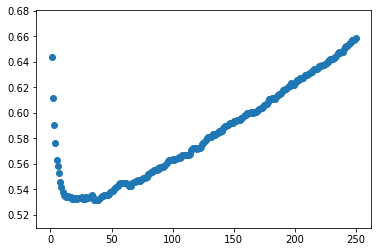

In [115]:
plt.scatter(sp.arange(1, test_loss.shape[0]+1, 1), test_loss)

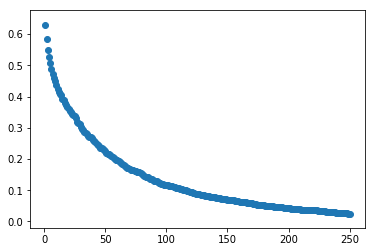

In [116]:
plt.scatter(sp.arange(1, train_loss.shape[0]+1, 1), train_loss)

In [117]:
@answer
def overfit(fout):
    fout.write("overfitting")
overfit()

*** OUTPUT (output/01_overfit.dat) ***
overfitting


In [118]:
@answer
def min_train_loss(fout):
    idx = sp.argmin(test_loss)
    fout.write(f"{test_loss[idx]:.2f} {idx+1}")
min_train_loss()

*** OUTPUT (output/02_min_train_loss.dat) ***
0.53 37


In [122]:
forest = RandomForestClassifier(n_estimators=37, random_state=241)

In [123]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=37, n_jobs=None,
            oob_score=False, random_state=241, verbose=0, warm_start=False)

In [124]:
@answer
def forest_loss(fout):
    probs = forest.predict_proba(X_test)
    loss = log_loss(y_test, probs)
    fout.write(f"{loss:.2f}")
forest_loss()

*** OUTPUT (output/03_forest_loss.dat) ***
0.54
